# Audi Car Price Prediction

# Importing all necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error

In [2]:
audi=pd.read_csv("audi.csv")
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


# Exploratory Data Analysis

In [3]:
audi.shape

(10668, 9)

In [4]:
audi.describe

<bound method NDFrame.describe of       model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 c

In [5]:
# There no null values and missing values in the data
audi.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

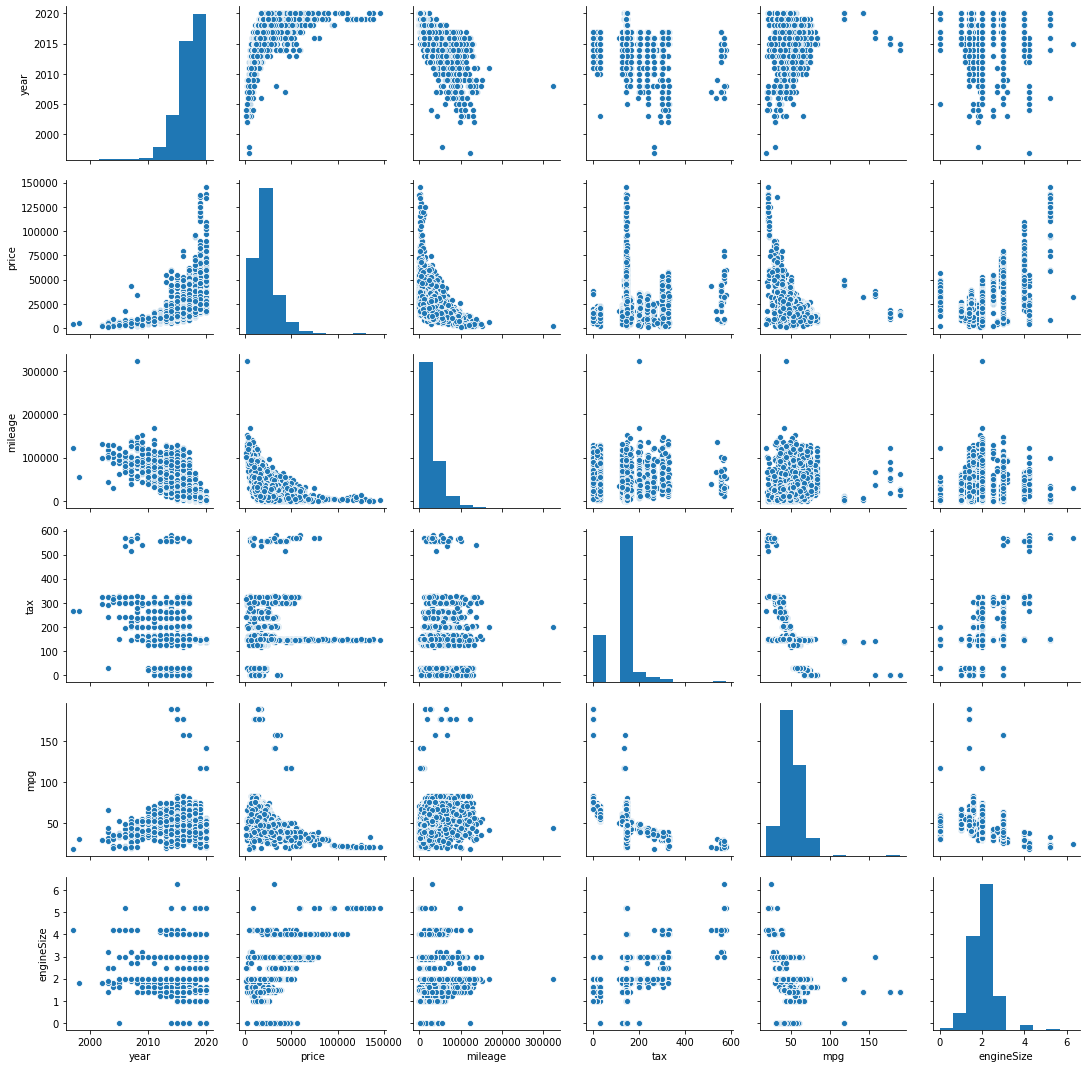

In [6]:
# Pairplotting to view the insights
sns.pairplot(audi)
plt.show()

<AxesSubplot:>

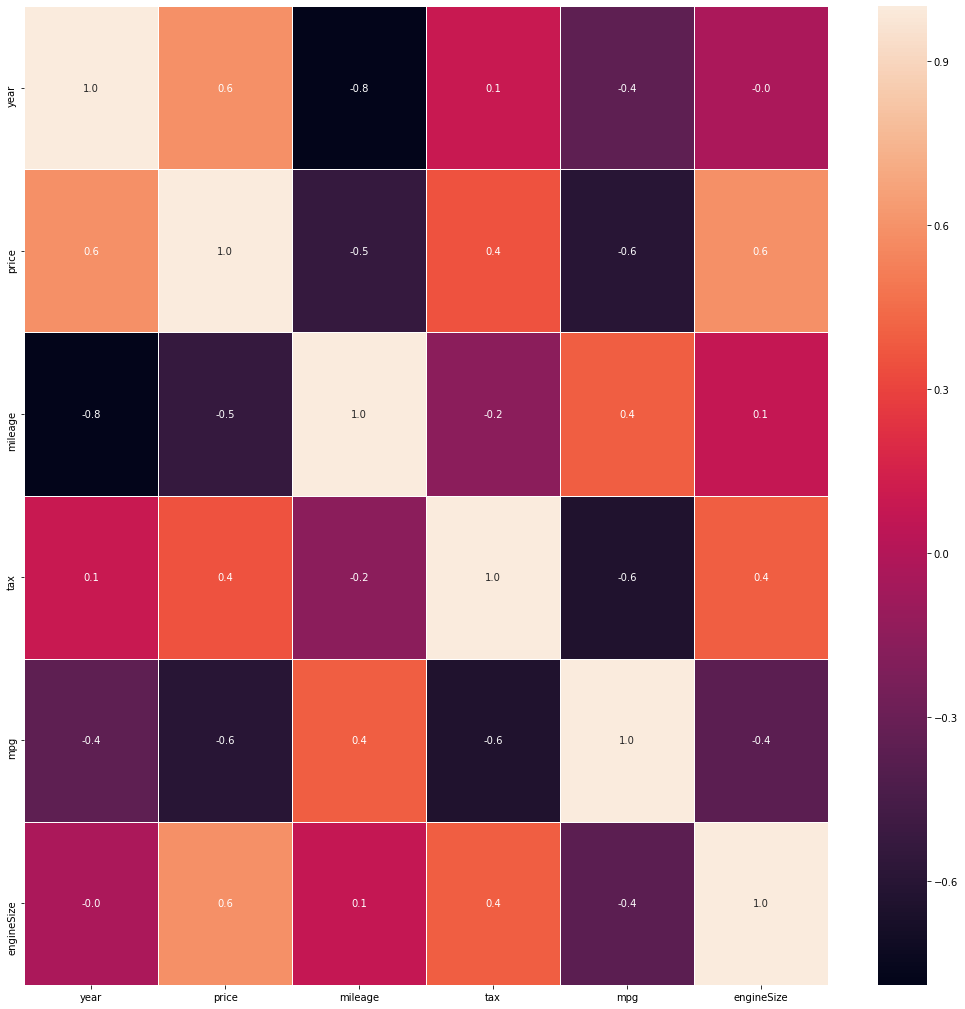

In [7]:
# The correlation between the features
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(audi.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)

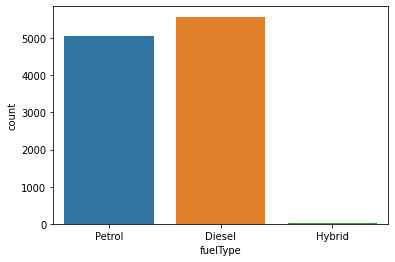

In [8]:
# Count plot on fuel type
ax = sns.countplot(audi.fuelType, label = "Count")

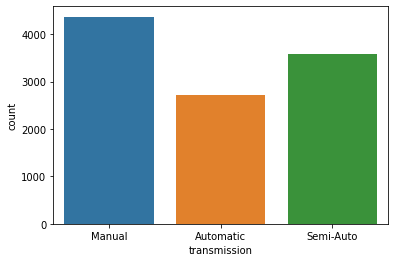

In [9]:
# Count plot on the transmission
ax = sns.countplot(audi.transmission, label = "Count")

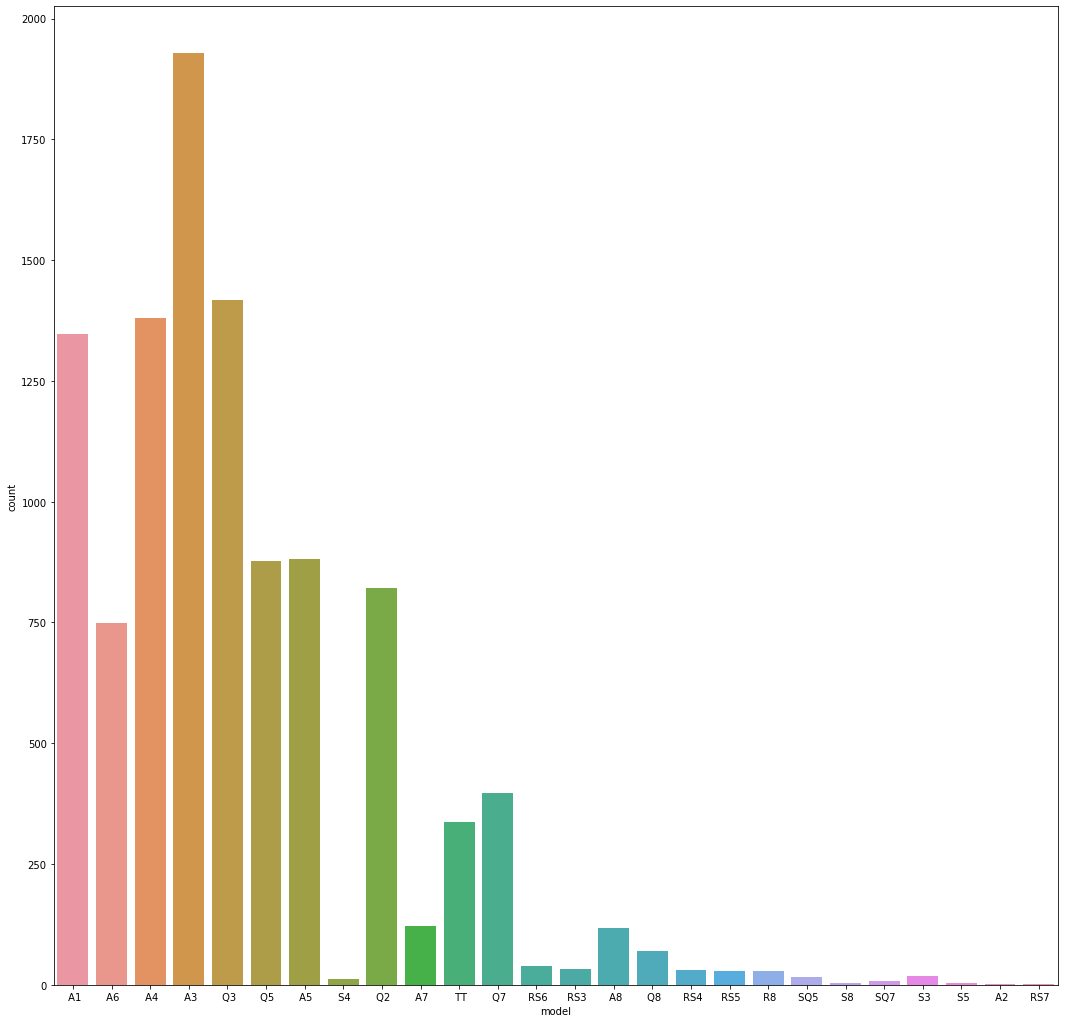

In [10]:
# Count plot on model
plt.subplots(figsize=(18,18))
ax = sns.countplot(audi.model, label = "Count")

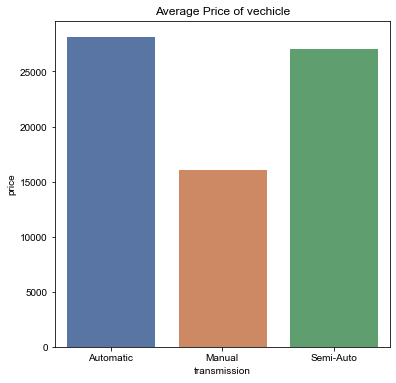

In [11]:
# Checking the price of car by transimission type
plt.subplots(figsize=(6,6))
price_by_transmission = audi.groupby("transmission")['price'].mean().reset_index()
plt.title("Average Price of vechicle")
sns.set()
sns.barplot(x="transmission", y ="price", data = price_by_transmission)
plt.show()

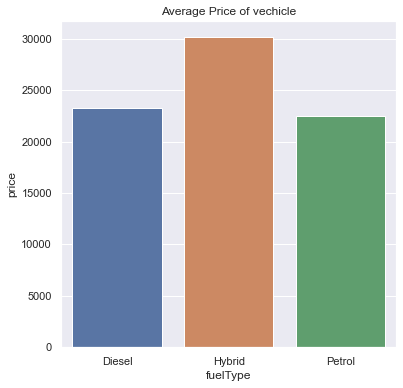

In [12]:
# Checking the price by fueltype
plt.subplots(figsize=(6,6))
price_by_fuel = audi.groupby("fuelType")['price'].mean().reset_index()
plt.title("Average Price of vechicle")
sns.set()
sns.barplot(x="fuelType", y ="price", data = price_by_fuel)
plt.show()

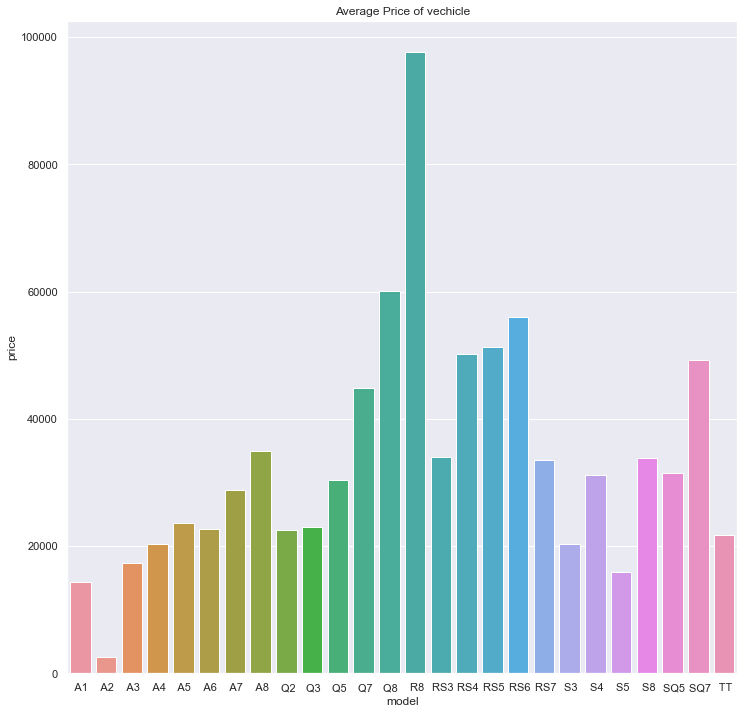

In [13]:
# Checking the price by model
plt.subplots(figsize=(12,12))
price_by_model = audi.groupby("model")['price'].mean().reset_index()
plt.title("Average Price of vechicle")
sns.set()
sns.barplot(x="model", y ="price", data = price_by_model)
plt.show()

In [14]:
audi.info

<bound method DataFrame.info of       model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 col

# Feature Engineering

In [15]:
# Checking for null values
audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

There is no missing values in the dataset

In [16]:
# Converting categorical variables into numerical ones

In [17]:
encoder = LabelEncoder()
audi['model'] = encoder.fit_transform(audi['model'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
model_mapping

{0: ' A1',
 1: ' A2',
 2: ' A3',
 3: ' A4',
 4: ' A5',
 5: ' A6',
 6: ' A7',
 7: ' A8',
 8: ' Q2',
 9: ' Q3',
 10: ' Q5',
 11: ' Q7',
 12: ' Q8',
 13: ' R8',
 14: ' RS3',
 15: ' RS4',
 16: ' RS5',
 17: ' RS6',
 18: ' RS7',
 19: ' S3',
 20: ' S4',
 21: ' S5',
 22: ' S8',
 23: ' SQ5',
 24: ' SQ7',
 25: ' TT'}

In [18]:
audi['transmission'] = encoder.fit_transform(audi['transmission'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}

In [19]:
audi['fuelType'] = encoder.fit_transform(audi['fuelType'])
fuelType_mapping = {index : label for index, label in enumerate(encoder.classes_)}
fuelType_mapping

{0: 'Diesel', 1: 'Hybrid', 2: 'Petrol'}

In [20]:
#Normalizing the data

In [21]:
x = audi.drop('price', axis=1)
y = audi['price']

In [22]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])

x 
 [[0.         0.86956522 0.5        0.04871223 1.         0.25862069
  0.21546635 0.22222222]
 [0.2        0.82608696 0.         0.11208084 0.         0.03448276
  0.2674144  0.31746032]
 [0.         0.82608696 0.5        0.09270927 1.         0.05172414
  0.21546635 0.22222222]
 [0.12       0.86956522 0.         0.0803439  0.         0.25
  0.28571429 0.31746032]
 [0.08       0.95652174 0.5        0.00618268 1.         0.25
  0.18122786 0.15873016]
 [0.         0.82608696 0.         0.09987337 1.         0.05172414
  0.23612751 0.22222222]
 [0.2        0.82608696 0.         0.23773139 0.         0.05172414
  0.25088548 0.31746032]
 [0.12       0.82608696 0.5        0.23276852 0.         0.03448276
  0.30519481 0.31746032]
 [0.08       0.7826087  0.5        0.14275896 1.         0.03448276
  0.24321133 0.22222222]
 [0.         0.82608696 0.5        0.06950486 1.         0.05172414
  0.21546635 0.22222222]]
y 
 0    12500
1    16500
2    11000
3    16800
4    17300
5    13900
6    13

# Model Building

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=0)

In [24]:
print("x_train shape is:",x_train.shape)

x_train shape is: (10638, 8)


In [25]:
print("x_test shape is:",x_test.shape)

x_test shape is: (30, 8)


In [26]:
print("y_train shape is:",y_train.shape)

y_train shape is: (10638,)


In [27]:
print("y_test shape is:",y_test.shape)

y_test shape is: (30,)


# Linear Regression

In [28]:
LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(x_train, y_train)

print('Linear Regression Train Score is : ' , LinearRegressionModel.score(x_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(x_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)
print('----------------------------------------------------')

y_pred = LinearRegressionModel.predict(x_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])


Linear Regression Train Score is :  0.7872370974393208
Linear Regression Test Score is :  0.5968641922659835
Linear Regression Coef is :  [ 2.65982415e+02  2.12389914e+03 -1.77525318e+02 -9.49075877e-02
  5.12642784e+02 -1.76789734e+01 -1.66648592e+02  1.09381527e+04]
Linear Regression intercept is :  -4271144.424454918
----------------------------------------------------
Predicted Value for Linear Regression is :  [14026.20107129 30676.98165748 31423.28803738 26396.17145025
 31184.51892066 31433.41617958 21143.33310015 12251.21270953
 19924.9489521  33370.53718373]


# Ridge Regression

Ridge(alpha=199.9)

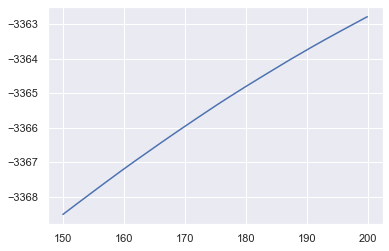

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
alpha_ridge = []
error_ridge = []

for i in range(1500, 2000):
    alpha_ridge.append(i/10)
    ridge_cv = Ridge(alpha=(i/10.0))
    error_ridge.append(np.mean(cross_val_score(ridge_cv, x_train, y_train, cv=4, scoring='neg_mean_absolute_error')))

plt.plot(alpha_ridge, error_ridge)

df_err_ridge = pd.DataFrame(data = {'alpha': alpha_ridge, 'error': error_ridge})
ridge_alpha = df_err_ridge['alpha'][df_err_ridge['error'].idxmax()]

# Ridge Regression
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(x_train, y_train)

In [30]:
print('Ridge Regressor Train Score is : ' , ridge.score(x_train, y_train))
print('Ridge Regressor Test Score is : ' , ridge.score(x_test, y_test))

print('----------------------------------------------------')

y_pred = ridge.predict(x_test)
print('Predicted Value Ridge Regressor is : ' , y_pred[:10])


Ridge Regressor Train Score is :  0.7859292806827501
Ridge Regressor Test Score is :  0.6425874424846109
----------------------------------------------------
Predicted Value Ridge Regressor is :  [14233.16859814 30437.53272504 31157.38109777 26130.98315632
 31046.02373965 31796.4086847  21116.16834133 14102.11130178
 20534.52415909 33697.85996402]


# Lasso Regression 

Lasso(alpha=24.9)

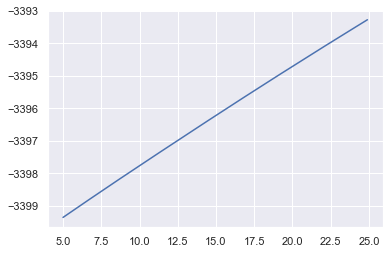

In [31]:
alpha_lasso = []
error_lasso = []

for i in range(50, 250):
    alpha_lasso.append(i/10)
    lasso_cv = Lasso(alpha=(i/10.0))
    error_lasso.append(np.mean(cross_val_score(lasso_cv, x_train, y_train, cv=4, scoring='neg_mean_absolute_error')))

plt.plot(alpha_lasso, error_lasso)

df_err_lasso = pd.DataFrame(data = {'alpha': alpha_lasso, 'error': error_lasso})
lasso_alpha = df_err_lasso['alpha'][df_err_lasso['error'].idxmax()]

# Lasso Regression
lasso = Lasso(alpha=lasso_alpha)
lasso.fit(x_train, y_train)

In [32]:
print('Lasso Regressor Train Score is : ' , lasso.score(x_train, y_train))
print('Lasso Regressor Test Score is : ' , lasso.score(x_test, y_test))

print('----------------------------------------------------')

y_pred = lasso.predict(x_test)
print('Predicted Value Ridge Regressor is : ' , y_pred[:10])


Lasso Regressor Train Score is :  0.78718138783558
Lasso Regressor Test Score is :  0.6040963376902253
----------------------------------------------------
Predicted Value Ridge Regressor is :  [14086.39464608 30606.57519698 31304.9165575  26366.7940097
 31186.22345145 31524.9103052  21163.28450716 12488.82601179
 19980.62463675 33439.09649542]


# Random Forest Regressor

In [33]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=11, random_state=33)
RandomForestRegressorModel.fit(x_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])


Random Forest Regressor Train Score is :  0.975690968356232
Random Forest Regressor Test Score is :  0.9708190721522107
Random Forest Regressor No. of features are :  8
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [15444.840533   23439.64042434 27967.35277748 27409.64024733
 32041.14818844 28397.95626306 16717.8616274  34000.01842346
 20141.700503   29835.80731183]


# Support Vector Regression

In [34]:
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(x_train, y_train)

print('SVRModel Train Score is : ' , SVRModel.score(x_train, y_train))
print('SVRModel Test Score is : ' , SVRModel.score(x_test, y_test))
print('----------------------------------------------------')

y_pred = SVRModel.predict(x_test)
print('Predicted Value for SVRModel is : ' , y_pred[:10])

SVRModel Train Score is :  0.06009639727174443
SVRModel Test Score is :  0.12834623937621403
----------------------------------------------------
Predicted Value for SVRModel is :  [18302.82494333 21508.41749352 21722.41899916 20631.53142302
 21609.47710928 21748.04567665 19503.17213057 21711.8147142
 21612.19685334 21668.80456522]


# Decision Tree Regressor

In [35]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=11,random_state=33)
DecisionTreeRegressorModel.fit(x_train, y_train)

print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(x_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(x_test, y_test))
print('----------------------------------------------------')
y_pred = DecisionTreeRegressorModel.predict(x_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:10])

DecisionTreeRegressor Train Score is :  0.971543185117051
DecisionTreeRegressor Test Score is :  0.9639875288509203
----------------------------------------------------
Predicted Value for DecisionTreeRegressorModel is :  [15465.06349206 23824.31818182 28166.29487179 26989.57142857
 32048.08219178 28166.29487179 16366.71428571 33319.328125
 19602.16149068 29548.47058824]


# Conclusion

In [38]:
# Accuracy Comparison
dicti= { 'Linear Regression' : [78.7, 59.6], 'Ridge Regression':[78.59,64.25],'Lasso Regression':[78.71,60.40],'Support Vector Regressor':[6,12],
       'Random Forest Regressor':[97.56,97.08], 'Decision Tree Regressor ':[97.15,96.39]}

In [39]:
df= pd.DataFrame.from_dict(data=dicti,orient='index',columns= ['Training Accuracy','Testing Accuracy'])
df

,Training Accuracy,Testing Accuracy
Linear Regression,78.70,59.60
Ridge Regression,78.59,64.25
Lasso Regression,78.71,60.40
Support Vector Regressor,6.00,12.00
Random Forest Regressor,97.56,97.08
Decision Tree Regressor,97.15,96.39


Random Forest well for both Training and Testing Dataset. It gives higher accuracy as compare to other algorithms.